# 2e hands auto's

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

### imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats
import sys

sys.path.append('..')
sys.path.append('..//packages')
from cars_functies import read_cars_data
from cars_constants import *

CARS_DATA_LOCATION = os.path.join('..', 'data', 'input', 'cars.csv')


### data inlezen

In [2]:
df_cars = read_cars_data(CARS_DATA_LOCATION)                

### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

* Jaar is categorische data / ordinaal / (niet numeriek omdat je er geen bewerkingen op kan doen) 
* fuel_type is categorisch / in principe niet ordinaal (zeker niet numeriek, dan niet binair en in principe ook niet ordinaal, tenzij je er toch een bepaalde rangschikking aan zou willen toekennen (alpfabetisch, milieuvriendelijkheid, ..) 
* seller_rating is ook ordinale data (je kan ze niet bv niet optellen) 

### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

In [3]:
# Check if the price column contains NaN values
if df_cars[df_cars.manufacturer == MAKE].price.isnull().any():
    print("FYI - The column contains NaN values.")
    print ()

print (f"Average price for all {MAKE} Cars = {round(df_cars[df_cars.manufacturer == MAKE].price.mean())}.")

Average price for all Volvo Cars = 35800.


### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
![alt text](image.png)
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

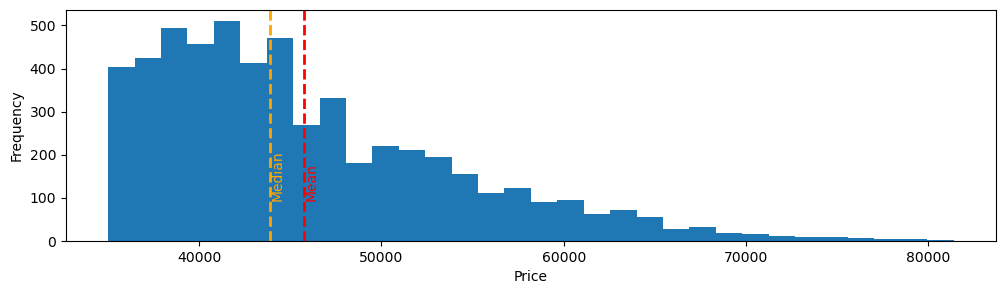

In [4]:
filtered_df_cars = df_cars[(df_cars.manufacturer == MAKE) & (df_cars.price >= 35000)]

plt.figure(figsize=(12, 3))

plt.xlabel("Price")
plt.ylabel("Frequency")

#average price
avg_price = filtered_df_cars.price.mean()
plt.axvline(x=avg_price, color='red', linestyle='--', linewidth=2)
plt.text(avg_price + 2, 100, 'Mean', color='red', rotation=90)

#median price
median_price = filtered_df_cars.price.median()
plt.axvline(x=median_price, color='orange', linestyle='--', linewidth=2)
plt.text(median_price + 2, 100, 'Median', color='orange', rotation=90)

plt.hist(filtered_df_cars.price, bins=32);

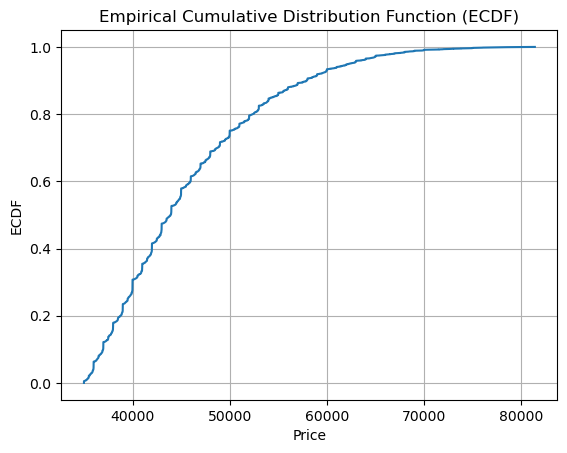

In [5]:
# Calculate the empirical cumulative distribution function (ECDF)
ecdf = ECDF(filtered_df_cars.price)

# Plot the ECDF
plt.plot(ecdf.x, ecdf.y, linestyle='-')
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.grid(True)
plt.show()

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?
![alt text](image-1.png)

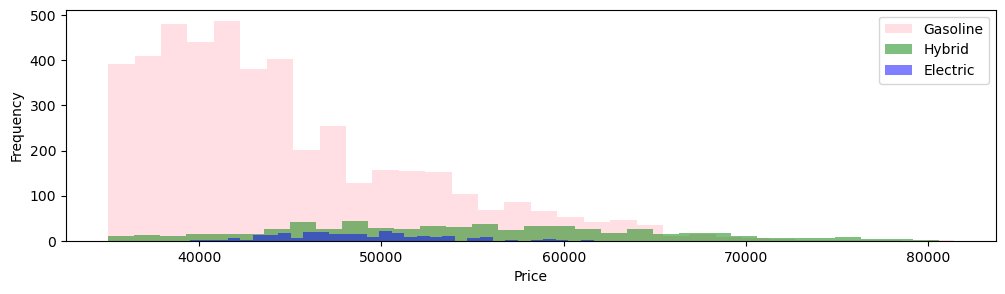

In [6]:
#clean data
df = filtered_df_cars.copy()
df['fuel_type'] = df['fuel_type'].replace(fuel_dict)

# Get the frequency of each unique value
sorted_values = df['fuel_type'].value_counts().sort_values(ascending=False)

i= 0
plt.figure(figsize=(12, 3))

# Iterate over the  values
for fuel_type_item, frequency in sorted_values.items():
    df[df.fuel_type == fuel_type_item].price.plot.hist(bins=32, 
                            color=PLOTTING_COLORS[i], alpha=0.5, label=fuel_type_item)
    i+=1

plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

## één andere voorstelling 

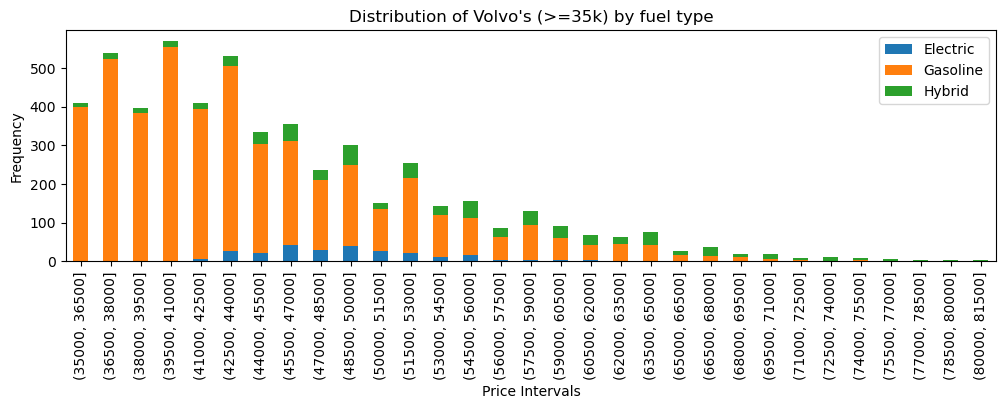

In [7]:
# Define numerical intervals, ongeveer aangesloten met vorige plot
bin_width = 1500
bins = [35000 + i*bin_width for i in range (32)]

df = filtered_df_cars.copy()
df['fuel_type'] = df['fuel_type'].replace(fuel_dict)

# Group data based on intervals and ordinal values, and count the number of rows in each group
df_group_by_price_range = df.groupby([pd.cut(df['price'], bins), 'fuel_type'], observed=False).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(12, 3))

# Plot stacked bar chart
df_group_by_price_range.plot(kind='bar', stacked=True, ax=ax)

plt.xlabel('Price Intervals')
plt.ylabel('Frequency')
plt.title("Distribution of Volvo's (>=35k) by fuel type")
plt.xticks(rotation=90)  
plt.legend()
plt.show()

### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![alt text](image-2.png)

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.
   ==> onwaar : gezien de size van de boxplot van de electrische wagens 'kleiner' is, liggen de waarden dichter bij mekaar 
   ==> ik kan dat wel niet goed aantonen met data ? Zie verder.
     
 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.  
     ==> niet te besluiten obv van de 2 boxplots: stel dat er maar 100 elektrische wagens zijn en 100000000000000 bezine wagens, dan is de kans toch groter dat ALS je een wagen hebt die meer dan 50000 kost, het een benzine wagen is 
     
 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen
   ==> waar: de bovenkant van het hokje van de elektrisch ligt boven 50k, dus > 25% kans dat ie meer kost dan 50k igv elektrisch              de bovenkant van het hokje van de benzine ligt onder 50k, dus < 25% kans dat ie meer kost dan een elektrisch

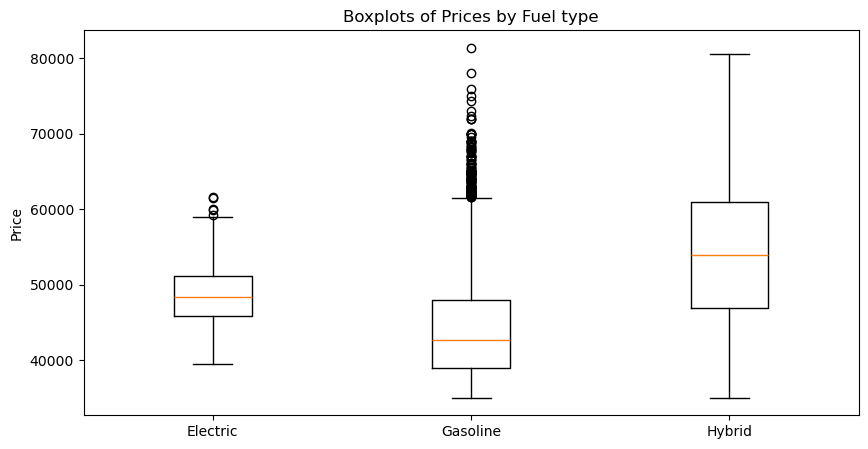

In [8]:
# boxplots eens maken
df = filtered_df_cars.copy()
df['fuel_type'] = df['fuel_type'].replace(fuel_dict)

# Filter the DataFrame based on different conditions
df_electrical_prices = df[df.fuel_type == "Electric"]
df_gasoline_prices = df[df.fuel_type == "Gasoline"]
df_hybrid_prices = df[df.fuel_type == "Hybrid"]

# Create a single subplot
plt.figure(figsize=(10, 5))

# Plot boxplots for both filters on the same axes
plt.boxplot([df_electrical_prices['price'], df_gasoline_prices['price'],  df_hybrid_prices['price']], 
            labels=['Electric', 'Gasoline', 'Hybrid'])
plt.title('Boxplots of Prices by Fuel type')
plt.ylabel('Price')

plt.show()

C:\Users\geens\anaconda3\envs\Opdr_Statistiek\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


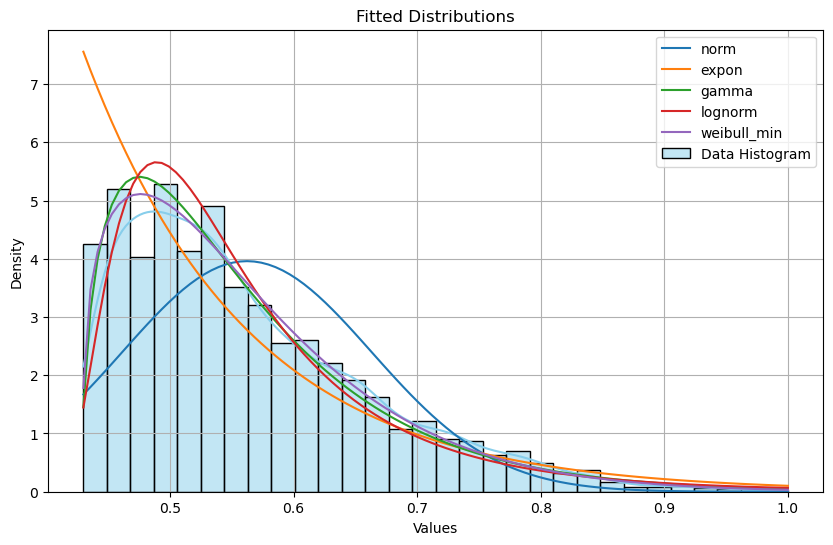

In [9]:
# uitzoeken welke verdeling het beste past (je moet wel een aantal kandidaten kiezen), de warnings krijg ik niet direct weg .. 

#normeren van de data
data = filtered_df_cars.price.copy().values / max (filtered_df_cars.price)

# Fit candidate distributions
dist_names = ['norm', 'expon', 'gamma', 'lognorm', 'weibull_min']
results = {}
for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    results[dist_name] = params

# Plot histograms and overlay fitted distributions
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, kde=True, stat='density', color='skyblue', label='Data Histogram')

for dist_name, params in results.items():
    dist = getattr(stats, dist_name)
    fitted_data = dist(*params)
    x = np.linspace(min(data), max(data), 100)
    plt.plot(x, fitted_data.pdf(x), label=dist_name)

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Fitted Distributions')
plt.legend()
plt.grid(True)
plt.show()



### we gaan voor de lognorm verdeling

In [10]:
#mean en variantie berekenen van de 2 gevallen (gasoline en electric)

df = filtered_df_cars.copy()
df['fuel_type'] = df['fuel_type'].replace(fuel_dict)


#electrical
df_electrical_prices = df[df.fuel_type == "Electric"]
prices_elec = df_electrical_prices.price.values

# Transform the data to a log scale and calculate the sample mean and sample variance of the log-transformed data
log_prices_elec = np.log(prices_elec)
sample_mean = np.mean(log_prices_elec)
sample_variance = np.var(log_prices_elec)

# Convert the sample mean and sample variance back to the original scale
estimated_mean_elec = np.exp(sample_mean)
estimated_variance_elec = np.exp(sample_variance)
print("Estimated Mean Elec:", estimated_mean_elec)
print("Estimated Variance Elec:", estimated_variance_elec)

#gasoline
df_gasoline_prices = df[df.fuel_type == "Gasoline"]
prices_gaso = df_gasoline_prices.price.values

# Transform the data to a log scale and calculate the sample mean and sample variance of the log-transformed data
log_prices_gaso = np.log(prices_gaso)
sample_mean = np.mean(log_prices_gaso)
sample_variance = np.var(log_prices_gaso)

# Convert the sample mean and sample variance back to the original scale
estimated_mean_gaso = np.exp(sample_mean)
estimated_variance_gaso = np.exp(sample_variance)

print("Estimated Mean Gaso:", estimated_mean_gaso)
print("Estimated Variance Gaso:", estimated_variance_gaso)


Estimated Mean Elec: 48615.4449569445
Estimated Variance Elec: 1.0070651056409456
Estimated Mean Gaso: 43884.6351086603
Estimated Variance Gaso: 1.0242998275041435


### toch wat vreemd ? 

- qua gemiddelde, dat lijkt wel overeen te komen met de box plot 
- qua variantie, die van de gaso is wel licht hoger dan die van de elec, maar toch maar weinig zo (wel op logaritmische schaal, maar toch ...)

### checken dat de 2 antwoorden op de andere vragen ook met de empirische data overeenkomen 

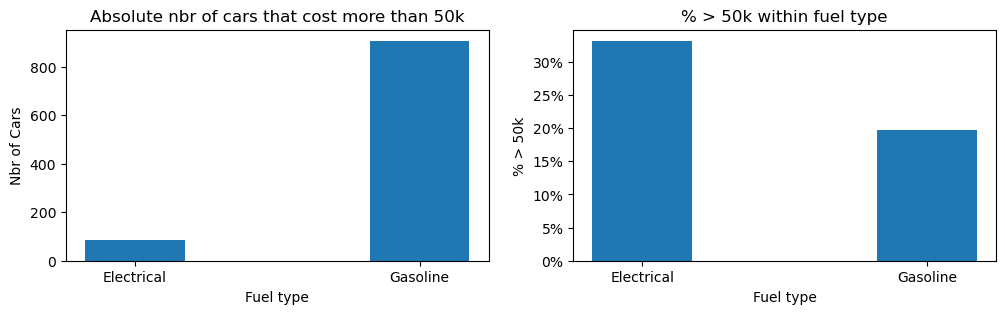

In [11]:
# Format function to convert the value to a percentage to have a nice y axis later on 
def percentage_formatter(x, pos):
    return '{:.0%}'.format(x)

plt.figure(figsize=(12, 3))

# check the number of cars that cost more than 50k IN ABSOLUTE NUMERS 
elec_more_than_50k = len(df_electrical_prices.price[df_electrical_prices.price >= 50000])
gaso_more_than_50k = len(df_gasoline_prices.price[df_gasoline_prices.price >= 50000])

# Plot the bars
plt.subplot(1, 2, 1) 
plt.bar([1,2], [elec_more_than_50k, gaso_more_than_50k], width=0.35, label='Set 1')
plt.xlabel('Fuel type')
plt.ylabel('Nbr of Cars')
plt.title('Absolute nbr of cars that cost more than 50k')
plt.xticks([1,2], ['Electrical', 'Gasoline'])

# let's  check the % of number of cars that cost more than 50k, within each fuel type
pct_elec_more_than_50k = len(df_electrical_prices.price[df_electrical_prices.price >= 50000]) / len (df_electrical_prices.price)
pct_gaso_more_than_50k = len(df_gasoline_prices.price[df_gasoline_prices.price >= 50000]) / len (df_gasoline_prices.price)

# Plot the bars
plt.subplot(1, 2, 2) 
plt.bar([1,2], [pct_elec_more_than_50k, pct_gaso_more_than_50k], width=0.35, label='Set 1')
plt.xlabel('Fuel type')
plt.ylabel('% > 50k')
plt.title('% > 50k within fuel type')
plt.xticks([1,2], ['Electrical', 'Gasoline'])
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.show()

### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

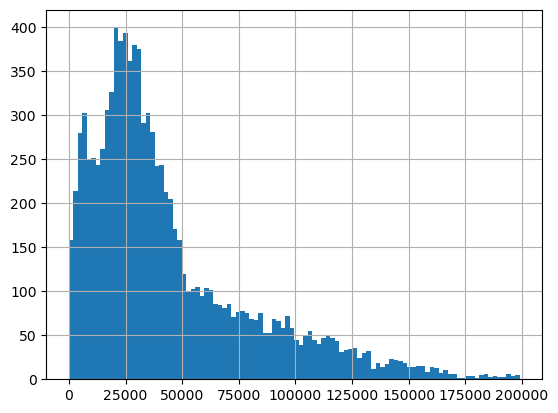

In [12]:
#eerst even kijken hoe die mileage eruit ziet / rare dingen eruit 
df_cars[(df_cars.manufacturer == MAKE) & (df_cars.mileage <= 200000)].mileage.hist(bins=100);

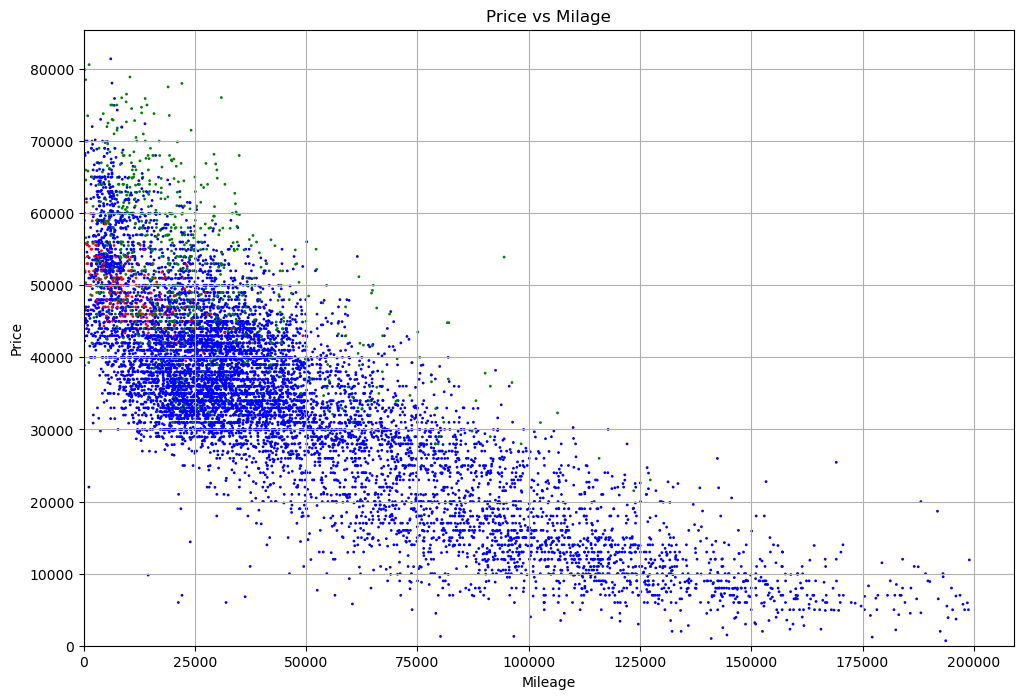

In [13]:
# ! hier terug even alle volvo's nemen en de outliers / rare data opkuisen (anders is het gemiddelde altijd beetje > 35.000)
df = df_cars[(df_cars.manufacturer == MAKE) & (df_cars.mileage<=200000)].dropna(subset=['fuel_type']).copy()
df['fuel_type'] = df['fuel_type'].replace(fuel_dict)

# Define colors for each distinct value in the color column
colors = df['fuel_type']
color_mapping = {'Electric': 'red', 'Gasoline': 'blue', 'Hybrid': 'green'}
# Map the colors based on the values in the color column
mapped_colors = [color_mapping[color] for color in colors]

plt.figure(figsize=(12, 8))
plt.scatter(df['mileage'], df['price'], s=1, c = mapped_colors)
plt.xlim(left=0)
plt.ylim(bottom=0)

# Add labels and title
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs Milage')

plt.grid(True)
plt.show()

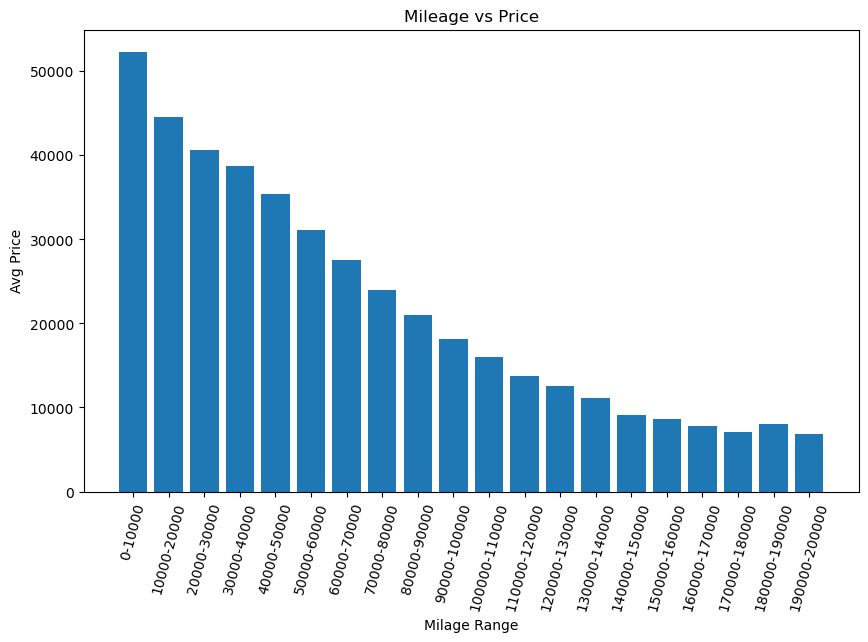

In [14]:
# Use pd.cut() to split the data into 20 different ranges, eliminating the outliers 
ranges = [i*10000 for i in range (21)]

# Group the DataFrame based on the ranges of mileage
grouped = df.groupby(pd.cut(df['mileage'], ranges), observed=False)

# Calculate the average value of price for each group
averages = grouped['price'].mean()

# Plot the average values against the ranges
plt.figure(figsize=(10, 6))
plt.bar(range(len(averages)), averages)
plt.xlabel('Milage Range')
plt.ylabel('Avg Price')
plt.title('Mileage vs Price')
plt.xticks(range(len(averages)), [f'{int(left)}-{int(right)}' for left, right in zip(ranges[:-1], ranges[1:])])
plt.xticks(rotation=75)  
plt.show()

### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

In [15]:
df = df_cars[(df_cars.manufacturer == MAKE) & (df_cars.fuel_type == "Electric") ]
prices = df['price']

mean_price = prices.mean()

# standaardafwijking
std_dev = prices.std(ddof=1)

# steekproefgrootte
n = len(prices)

# Bereken de standaardfout van het gemiddelde
sem = std_dev / np.sqrt(n)

# Bereken het betrouwbaarheidsinterval (95%)
confidence_level = 0.95
degrees_freedom = n - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_price, sem)

print(f"Gemiddelde prijs: {mean_price} euro")
print(f"Standaardafwijking: {std_dev} euro")
print(f"Steekproefgrootte: {n}")
print(f"Standaardfout van het gemiddelde: {sem} euro")
print(f"95% Betrouwbaarheidsinterval: {confidence_interval} euro")


Gemiddelde prijs: 48788.391304347824 euro
Standaardafwijking: 4162.028740786209 euro
Steekproefgrootte: 253
Standaardfout van het gemiddelde: 261.6645050406035 euro
95% Betrouwbaarheidsinterval: (48273.06337589856, 49303.71923279709) euro
